In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datatset Link
https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [189]:
maths=pd.read_csv("student-mat.csv",sep=';')



In [190]:
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [191]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [192]:
lis=['school','sex','address','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','internet','activities','nursery','higher','romantic']
for item in lis:
    pre = item + "_"
    dum = pd.get_dummies(maths[item], prefix = pre, drop_first=True)
    maths = pd.concat([maths,dum], axis = 1)
    maths = maths.drop([item], axis = 1)

In [193]:
maths.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian__mother,guardian__other,schoolsup__yes,famsup__yes,paid__yes,internet__yes,activities__yes,nursery__yes,higher__yes,romantic__yes
0,18,GT3,4,4,2,2,0,4,3,4,...,1,0,1,0,0,0,0,1,1,0
1,17,GT3,1,1,1,2,0,5,3,3,...,0,0,0,1,0,1,0,0,1,0
2,15,LE3,1,1,1,2,0,4,3,2,...,1,0,1,0,0,1,0,1,1,0
3,15,GT3,4,2,1,3,0,3,2,2,...,1,0,0,1,0,1,1,1,1,1
4,16,GT3,3,3,1,2,0,4,3,2,...,0,0,0,1,0,0,0,1,1,0


In [194]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
maths['famsize'] = le.fit_transform(maths['famsize'])

In [195]:
maths.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian__mother,guardian__other,schoolsup__yes,famsup__yes,paid__yes,internet__yes,activities__yes,nursery__yes,higher__yes,romantic__yes
0,18,0,4,4,2,2,0,4,3,4,...,1,0,1,0,0,0,0,1,1,0
1,17,0,1,1,1,2,0,5,3,3,...,0,0,0,1,0,1,0,0,1,0
2,15,1,1,1,1,2,0,4,3,2,...,1,0,1,0,0,1,0,1,1,0
3,15,0,4,2,1,3,0,3,2,2,...,1,0,0,1,0,1,1,1,1,1
4,16,0,3,3,1,2,0,4,3,2,...,0,0,0,1,0,0,0,1,1,0


In [196]:
maths.corr()['G3']

age                  -0.106505
famsize               0.045016
Medu                  0.240151
Fedu                  0.211800
traveltime           -0.127173
studytime             0.249789
failures             -0.393316
famrel                0.063361
freetime             -0.122705
goout                -0.087641
Dalc                 -0.204719
Walc                 -0.176619
health               -0.098851
absences             -0.091379
G1                    0.826387
G2                    0.918548
G3                    1.000000
school__MS           -0.284294
sex__M               -0.129077
address__U            0.167637
Pstatus__T           -0.000754
Mjob__health          0.101244
Mjob__other          -0.059251
Mjob__services        0.038447
Mjob__teacher         0.134910
Fjob__health          0.039142
Fjob__other          -0.005301
Fjob__services       -0.053204
Fjob__teacher         0.125916
reason__home          0.046537
reason__other        -0.132577
reason__reputation    0.170944
guardian

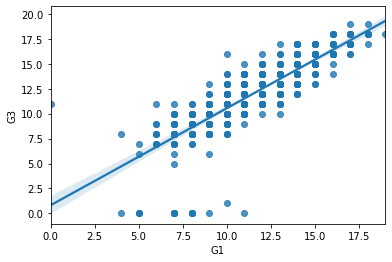

In [218]:
sns.regplot(maths['G1'],maths['G3'])

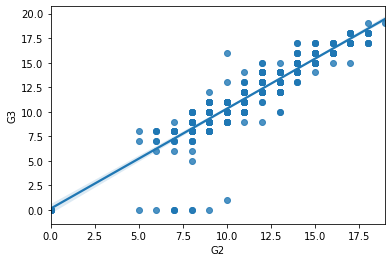

In [219]:
sns.regplot(maths['G2'],maths['G3'])

In [197]:
X=maths.drop(['G3'],axis=1).values
y=maths['G3']

In [198]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [199]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
lr.score(Xtrain,ytrain)

0.8687264170883103

In [200]:
lr.score(Xtest,ytest)

0.8177791841777694

In [201]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(Xtrain,ytrain)
rd.score(Xtrain,ytrain)

0.8687031910890672

In [202]:
rd.score(Xtest,ytest)

0.8182751502515653

In [213]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.01)
ls.fit(Xtrain,ytrain)
ls.score(Xtrain,ytrain)

0.8663448342202135

In [214]:
ls.score(Xtest,ytest)

0.8236377894637545

In [205]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(Xtrain,ytrain)
DTR.score(Xtrain,ytrain)

1.0

In [206]:
DTR.score(Xtest,ytest)

0.7080556864929722

In [207]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=75)
RFR.fit(Xtrain,ytrain)
RFR.score(Xtrain,ytrain)

0.9806533544973545

In [208]:
RFR.score(Xtest,ytest)

0.789666488115644

In [209]:
from sklearn.ensemble import VotingRegressor
estimators=[('lr',lr),('rd',rd),('ls',ls),('DTR',DTR),('RFR',RFR)]
ens=VotingRegressor(estimators=estimators)
ens.fit(Xtrain,ytrain)
ens.score(Xtrain,ytrain)


0.9421673871348822

In [210]:
ens.score(Xtest,ytest)

0.8286661408876661